In [10]:
%run test.py
test(1e12, 1e6, 1e6, 1e8, tmax_axion_time=100.0, axion_decay_time=100.0, debug=False)

old
decay done, took: 0.037526845932006836 seconds
axion done, took: 0.12345004081726074 seconds


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:113: RuntimeWarning: divide by zero encountered in true_divide
  
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:113: RuntimeWarning: divide by zero encountered in double_scalars
  


trans done, took: 1.0000004768371582 seconds
old
axion decay done, took: 0.04489564895629883 seconds


In [11]:
%timeit compute_asymmetry(1e12, 1e6, 1e6, 1e8, debug=False)

old


/home/jana/Documents/masters-project/transport_eq_in_time/test.py:100: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
old
1.19 s ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
import itertools

In [9]:
list(itertools.islice(itertools.cycle([1,2]), 10))

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

# Compare the old and the new decay code

In [ ]:
# new: 1.19 s ± 25.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# old: 1.19 s ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [12]:
import old_decay_process, new_decay_process
old_decay_process = importlib.reload(old_decay_process)
new_decay_process = importlib.reload(new_decay_process)

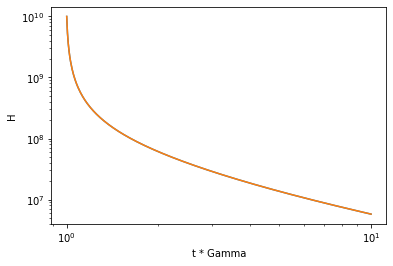

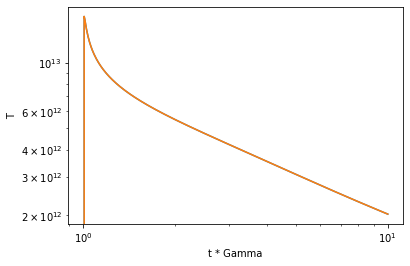

In [20]:
H0 = 1e10
rho_inf = 3*old_decay_process.M_pl**2*H0**2
Gamma = 1e8
tmax = 10.0
sol_old = old_decay_process.solve(tmax, 0.0, rho_inf, Gamma)
sol_new = new_decay_process.solve(tmax, 0.0, rho_inf, Gamma)
old_fn, _ = old_decay_process.to_temperature_and_hubble_fns(sol_old, rho_inf, Gamma)
new_fn, _ = new_decay_process.to_temperature_and_hubble_fns(sol_new, rho_inf, Gamma)
ts = np.geomspace(decay_process.t0, tmax, 400)
T_old, H_old = old_fn(ts)
T_new, H_new = new_fn(ts)
plt.figure()
plt.plot(ts, H_old, label="old")
plt.plot(ts, H_new, label="new")
plt.xlabel("t * Gamma")
plt.ylabel("H")
plt.xscale("log")
plt.yscale("log")
plt.figure()
plt.plot(ts, T_old, label="old")
plt.plot(ts, T_new, label="new")
plt.xlabel("t * Gamma")
plt.ylabel("T")
plt.xscale("log")
plt.yscale("log")

In [22]:
m_a = 1e7
ax_sol = axion_motion.single_axion_field.solve((1.0, 0.0), (m_a,), 10.0, old_fn, Gamma)

/home/jana/Documents/masters-project/transport_eq_in_time/old_decay_process.py:101: RuntimeWarning: invalid value encountered in double_scalars
  T = T_const * rho_R_prime**(1/4)


In [25]:
f_a = 1e12
rho_a = axion_motion.single_axion_field.get_energy(ax_sol.y[:, -1], f_a, Gamma, m_a)
rho_rad_end = decay_process.find_end_rad_energy(sol_old, rho_inf)
Gamma_a = axion_motion.single_axion_field.get_decay_constant(f_a, m_a)

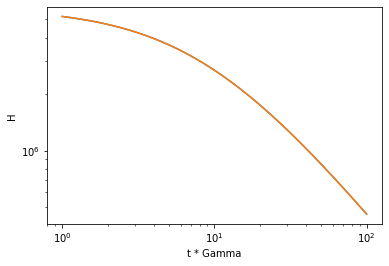

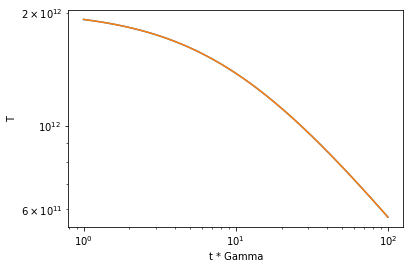

In [30]:
tmax = 100.0
sol_old = old_decay_process.solve(tmax, rho_rad_end, rho_a, Gamma)
sol_new = new_decay_process.solve(tmax, rho_rad_end, rho_a, Gamma)
old_fn, _ = old_decay_process.to_temperature_and_hubble_fns(sol_old, rho_a, Gamma)
new_fn, _ = new_decay_process.to_temperature_and_hubble_fns(sol_new, rho_a, Gamma)
ts = np.geomspace(decay_process.t0, tmax, 400)
T_old, H_old = old_fn(ts)
T_new, H_new = new_fn(ts)
plt.figure()
plt.plot(ts, H_old, label="old")
plt.plot(ts, H_new, label="new")
plt.xlabel("t * Gamma")
plt.ylabel("H")
plt.xscale("log")
plt.yscale("log")
plt.figure()
plt.plot(ts, T_old, label="old")
plt.plot(ts, T_new, label="new")
plt.xlabel("t * Gamma")
plt.ylabel("T")
plt.xscale("log")
plt.yscale("log")
old_decay_process.find_dilution_factor(sol_old, old_fn, debug=True)
new_decay_process.find_dilution_factor(sol_new, new_fn, debug=True)